In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import urllib.request

In [2]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/mohitgupta-omg/Kaggle-SMS-Spam-Collection-Dataset-/master/spam.csv", filename="spam.csv")
data = pd.read_csv('spam.csv',encoding='latin1')

In [3]:
data = data[data.columns[:2]] 
data.columns = ['category', 'text']

In [4]:
data.drop_duplicates(subset=['text'], inplace=True)

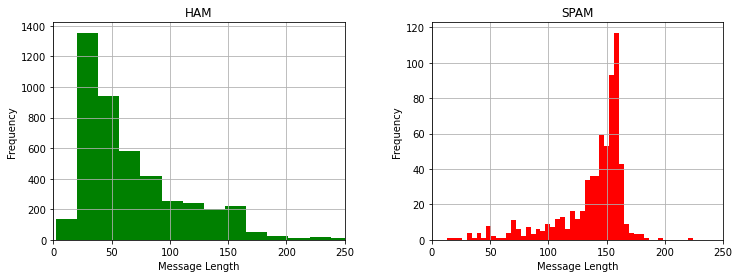

In [ ]:
data['category_01'] = data.category.map({'ham':0, 'spam':1})
data['text_length'] = data.text.apply(len)
fix, ax = plt.subplots(1,2, figsize=(12,4))

data[data.category=='ham'].hist(column='text_length', bins=50,ax=ax[0],color = 'green')
ax[0].set(xlabel = 'Message Length',ylabel = 'Frequency',title = 'HAM', xlim = (0, 250))
data[data.category=='spam'].hist(column='text_length', bins=50,ax=ax[1],color = 'red')
ax[1].set(xlabel = 'Message Length',ylabel = 'Frequency',title = 'SPAM', xlim = (0, 250));

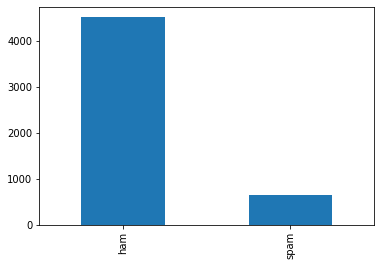

In [ ]:
data['category'].value_counts().plot(kind='bar');

### **WORD CLOUD**

In [ ]:
X_data = data['text']
y_data = data['category']

In [ ]:
import seaborn as sns
import re
import warnings
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
import nltk 
from nltk.corpus import stopwords
warnings.filterwarnings('ignore')

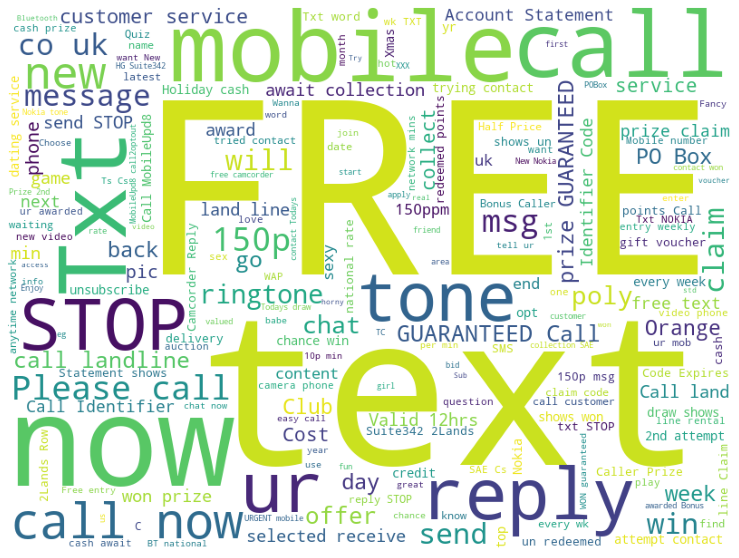

CPU times: user 1.82 s, sys: 69.3 ms, total: 1.89 s
Wall time: 1.89 s


In [ ]:
data_spam = data[data['category']== 'spam']

X_spam_data = data_spam['text']
y_spam_data = data_spam['category']

def displayWordCloud(data = None, backgroundcolor = 'white', width=800, height=600 ):
    wordcloud = WordCloud(stopwords = STOPWORDS, 
                          background_color = backgroundcolor, 
                         width = width, height = height).generate(data)
    plt.figure(figsize = (15 , 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show() 

%time displayWordCloud(''.join(X_spam_data))

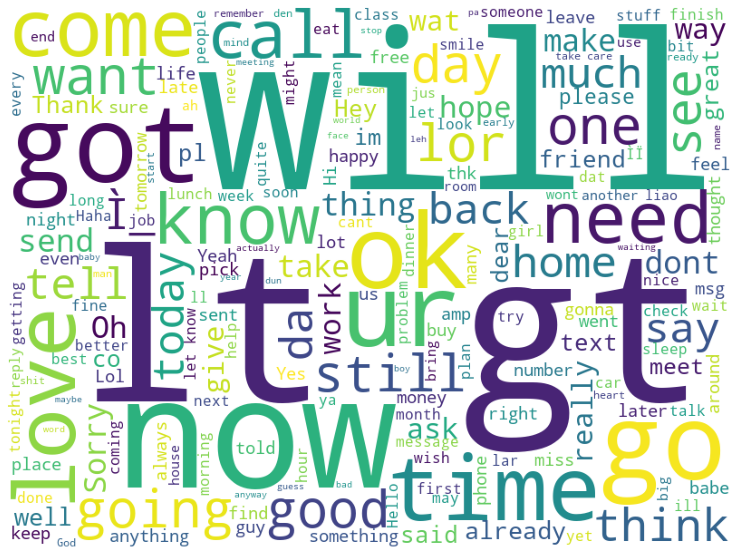

CPU times: user 1.98 s, sys: 76.3 ms, total: 2.06 s
Wall time: 2.06 s


In [ ]:
data_ham = data[data['category']== 'ham']

X_hdata = data_ham['text']
y_hdata = data_ham['category']


def displayWordCloud(data = None, backgroundcolor = 'white', width=800, height=600 ):
    wordcloud = WordCloud(stopwords = STOPWORDS, 
                          background_color = backgroundcolor, 
                         width = width, height = height).generate(data)
    plt.figure(figsize = (15 , 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show() 

%time displayWordCloud(''.join(X_hdata))